# Exploratory Data Analysis for Recidivism Dataset

## Step 0: Prepare a `MyPyTable` object with the cleaned Recidivism Dataset

In [1]:
import os
from mysklearn.mypytable import MyPyTable
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

filename = os.path.join("data", "cleaned-recidivism-data-NA.csv")
table = MyPyTable()
table.load_from_file(filename)

## Step 1: Frequency Diagrams
Create frequency diagrams for selected attributes

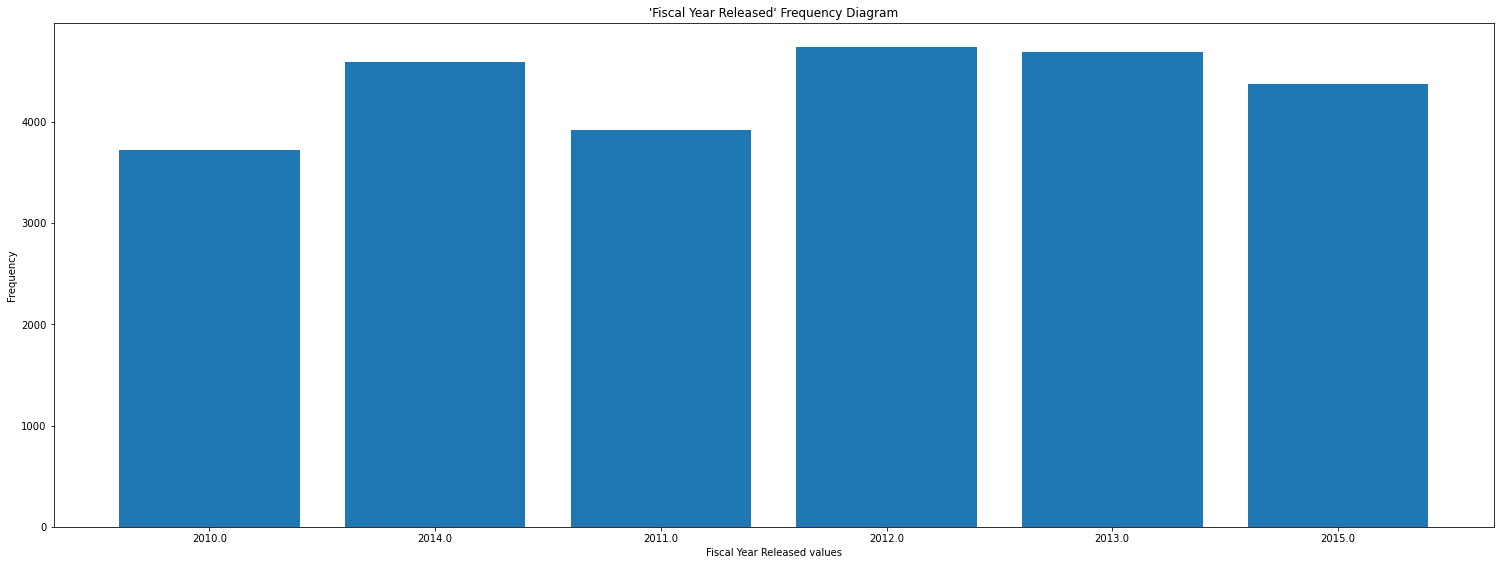

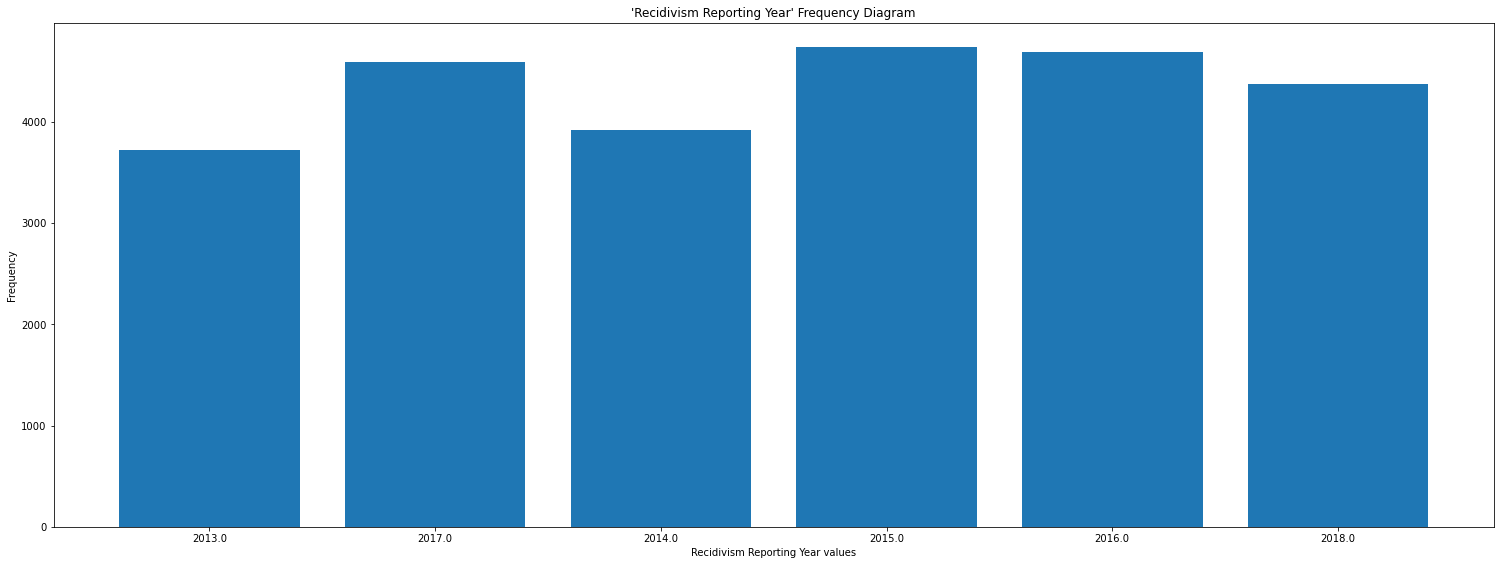

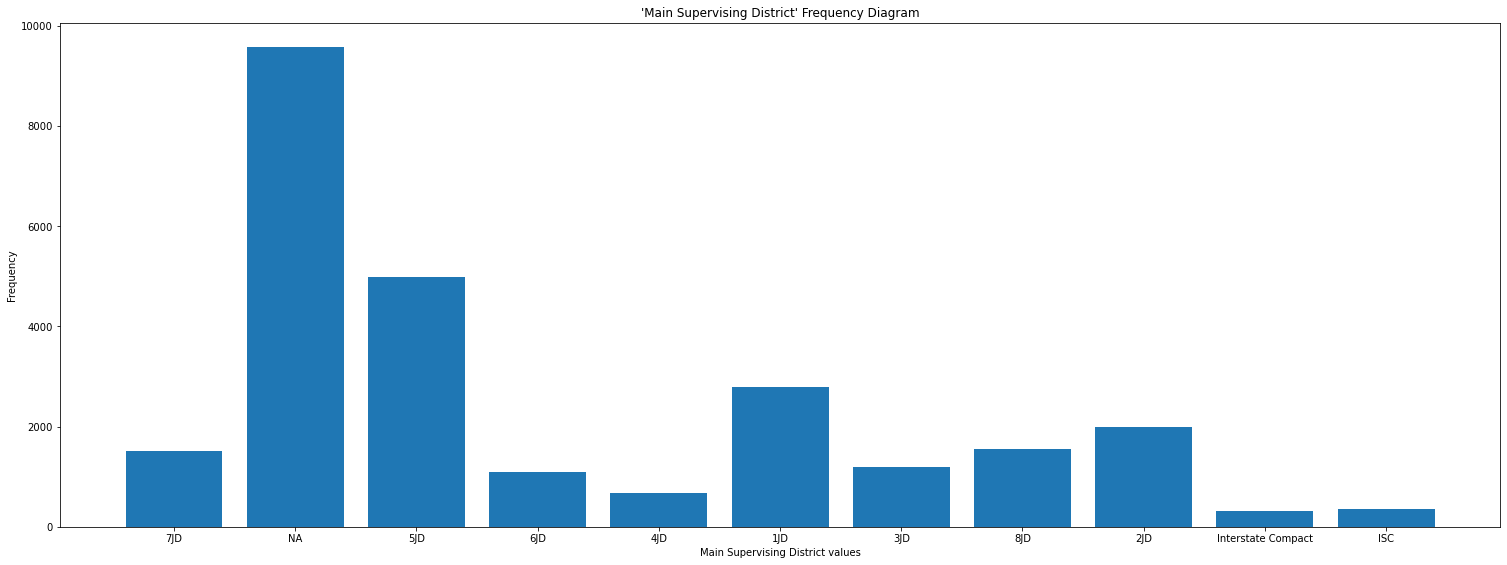

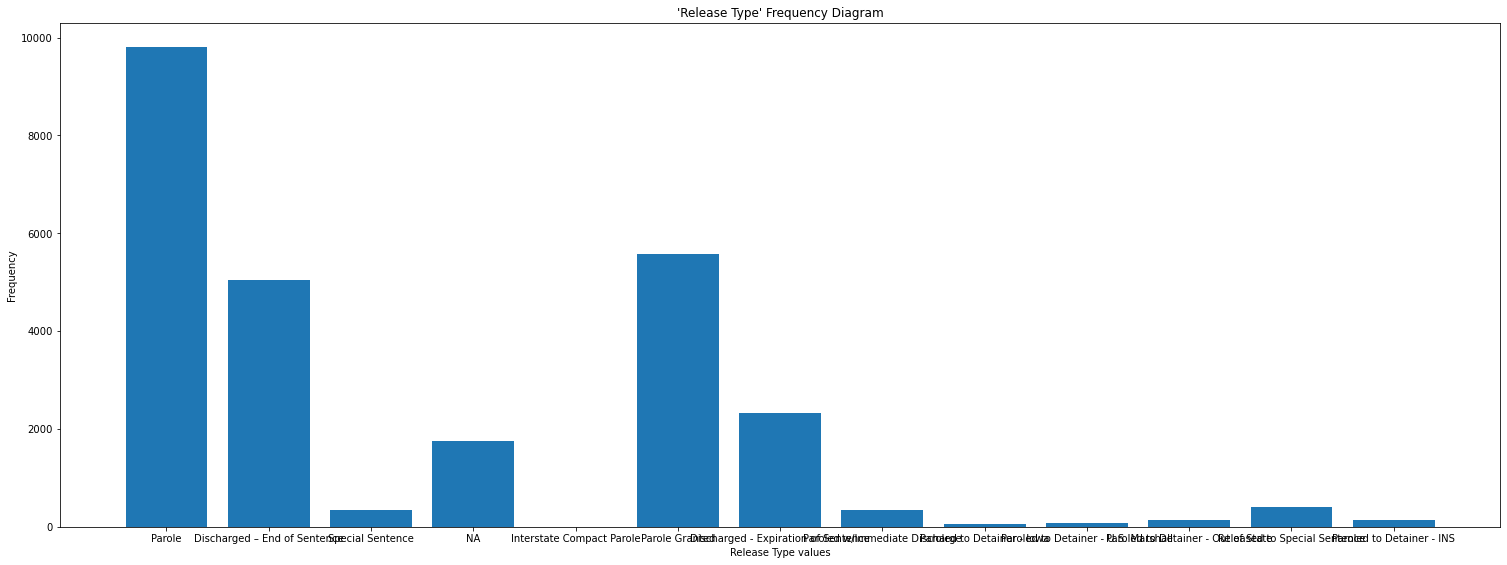

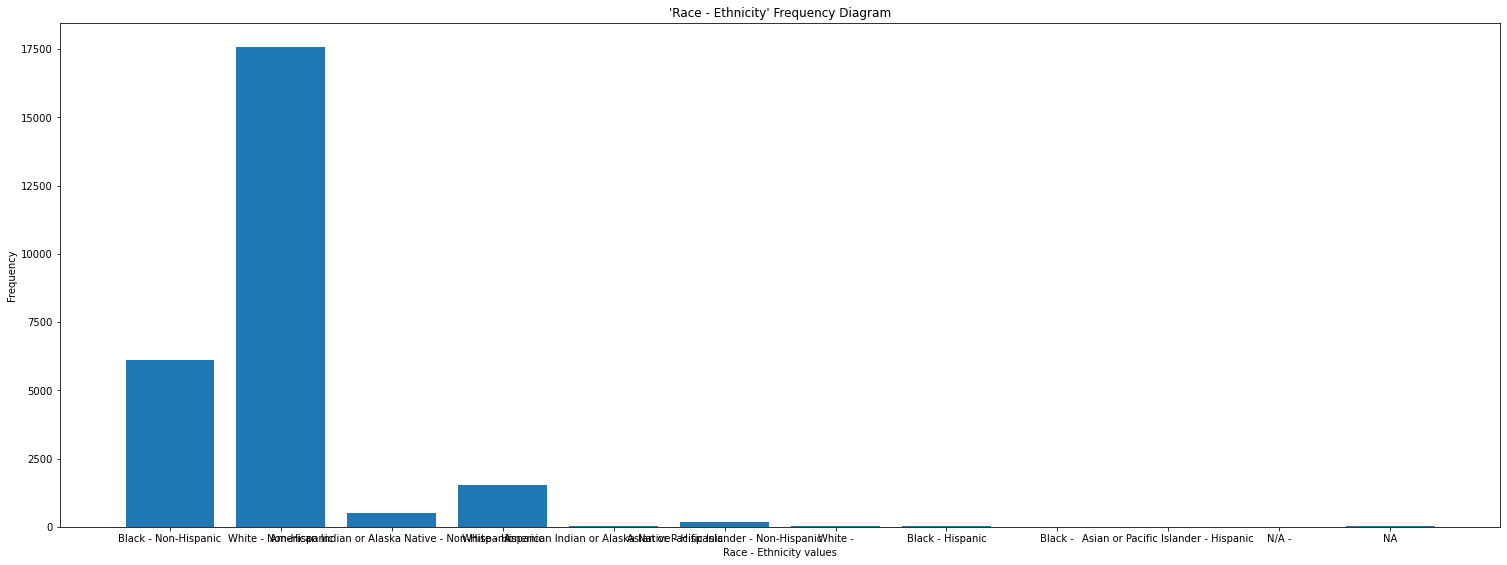

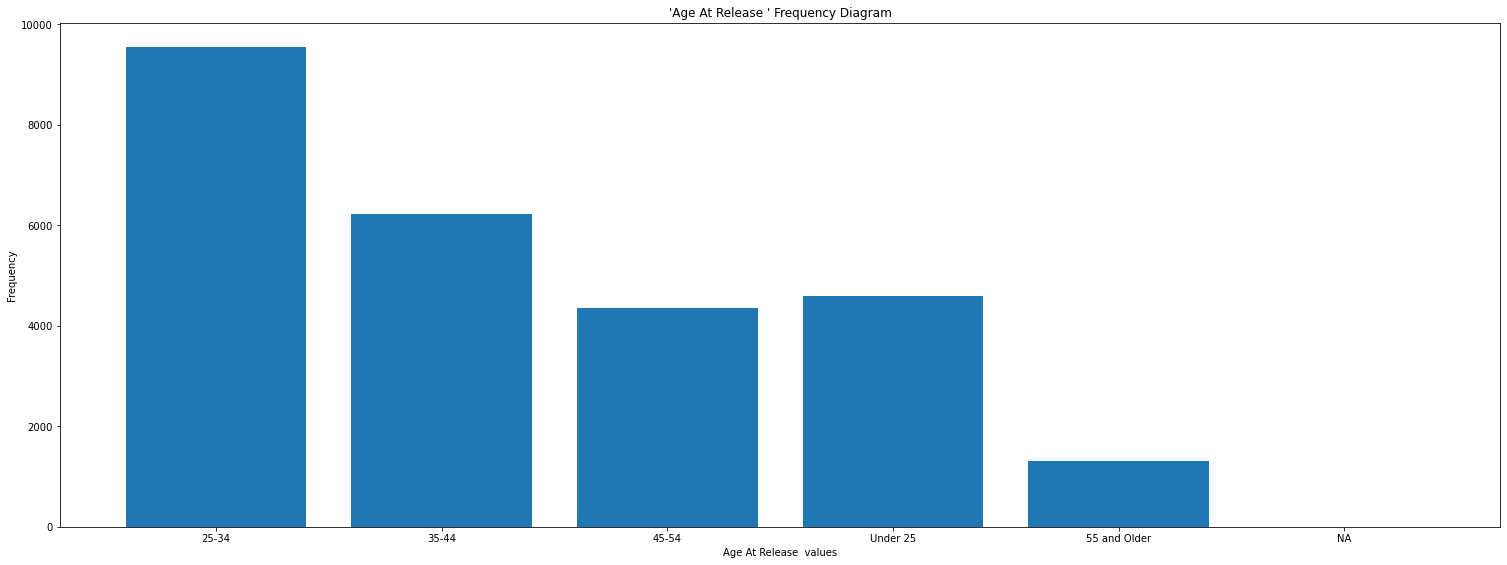

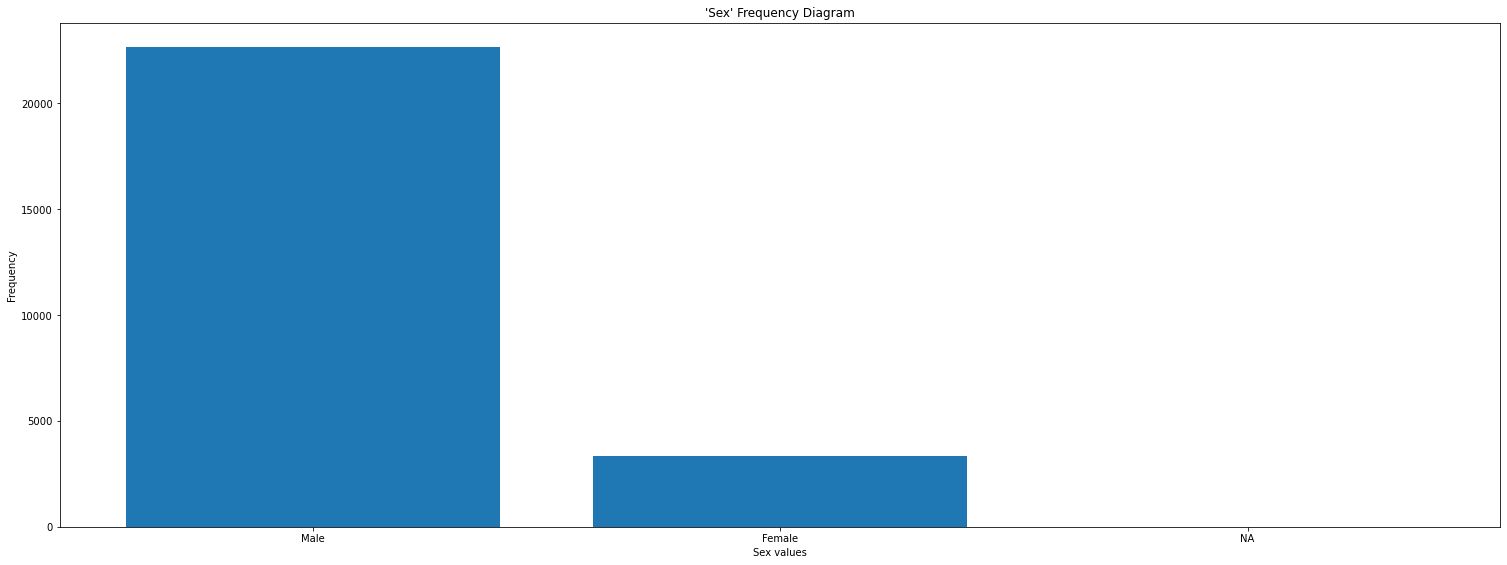

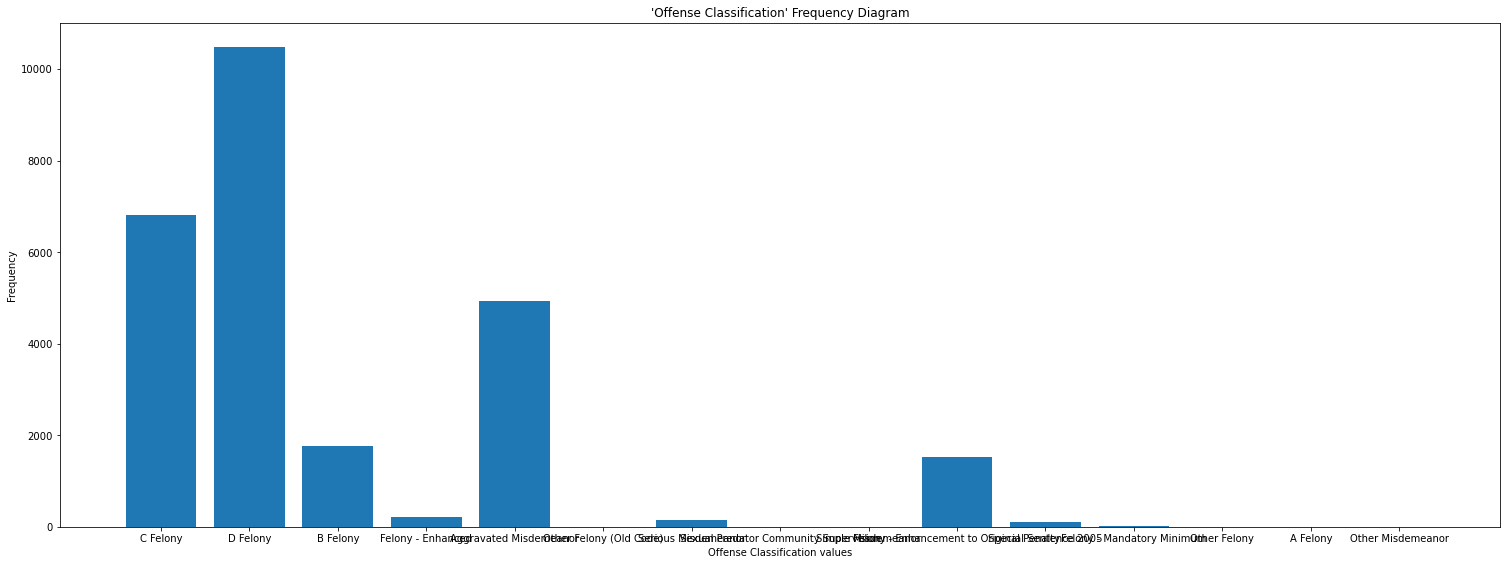

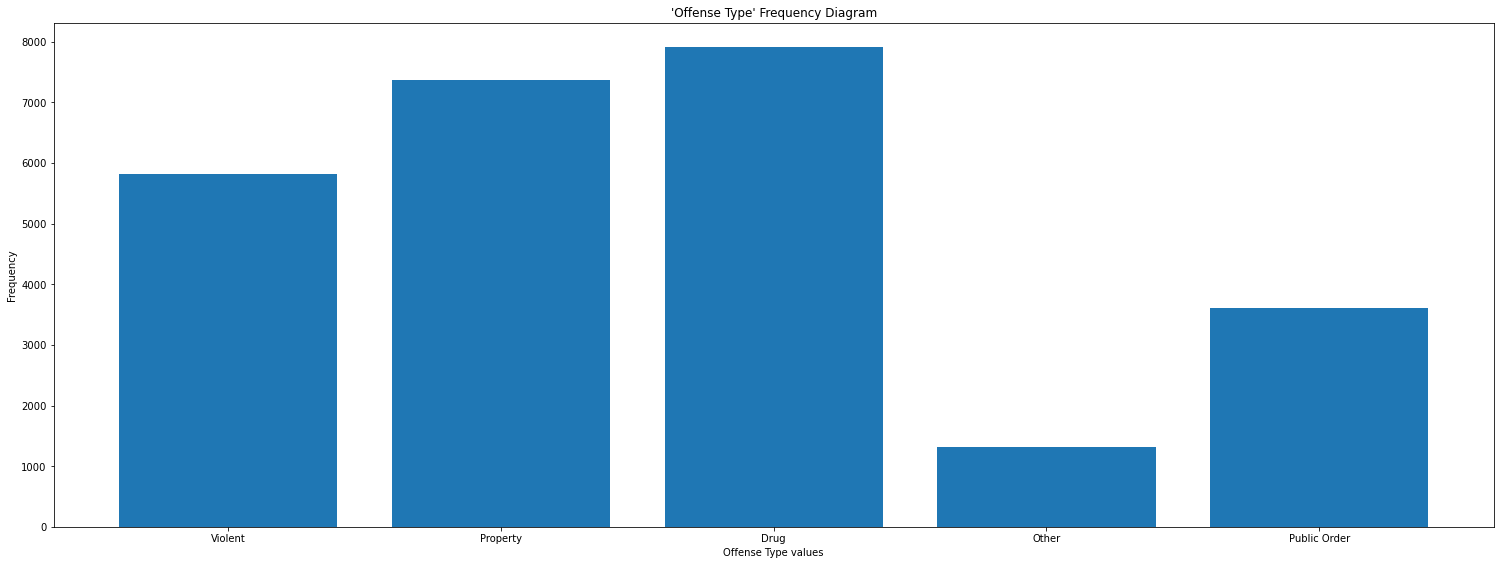

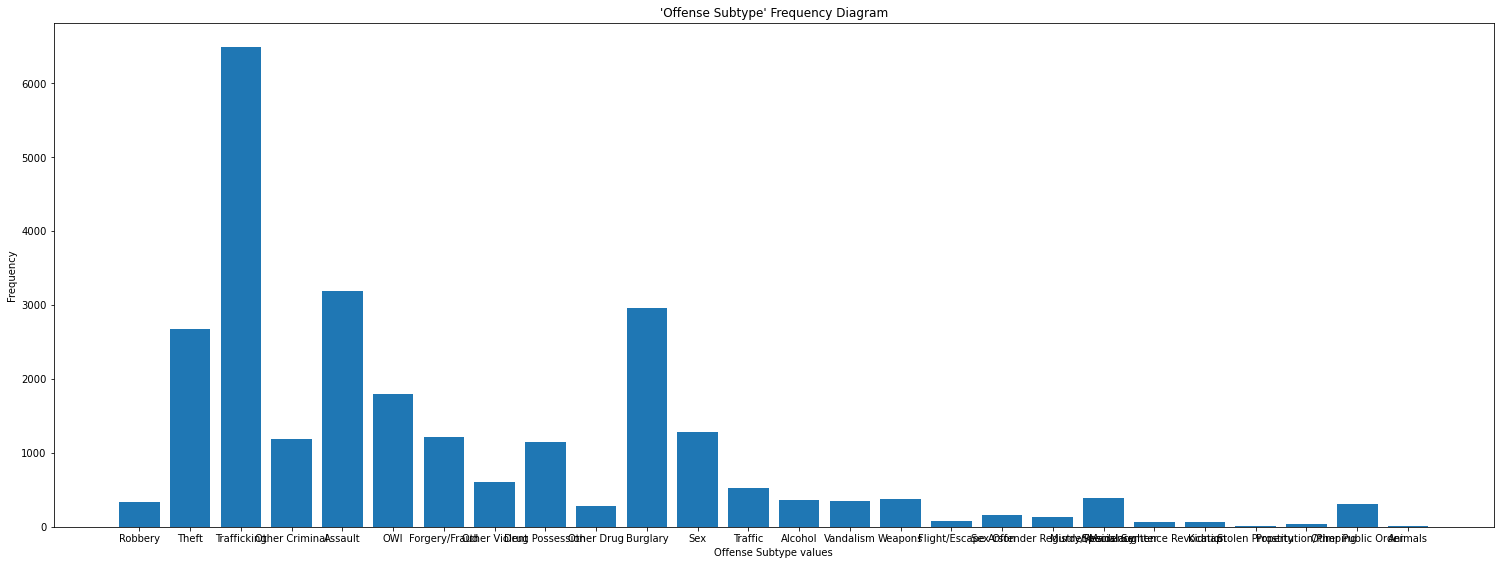

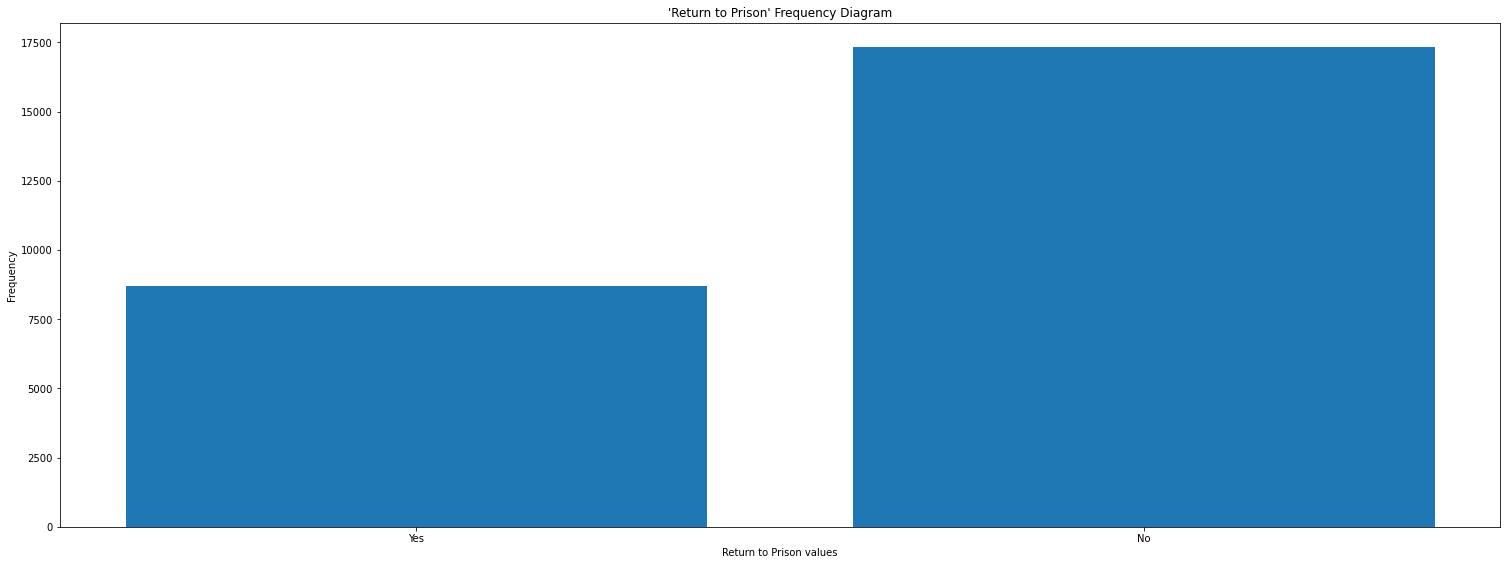

In [2]:
import plot_utils

for column_name in table.column_names:
    attribute_frequencies = table.get_column_frequency(column_name, include_missing_values=True)
    title = f"'{column_name}' Frequency Diagram"
    x_label = f"{column_name} values"
    y_label = "Frequency"
    x_values = attribute_frequencies.keys()
    y_values = attribute_frequencies.values()
    plot_utils.create_frequency_diagram(x_values, y_values, title, x_label, y_label)

## Step 2: Histograms
Create histograms for selected attributes

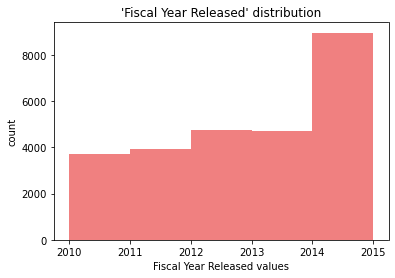

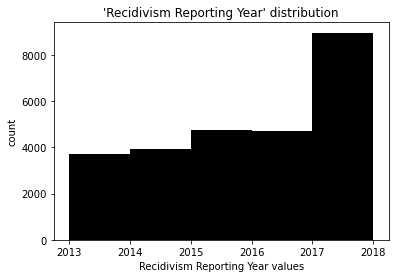

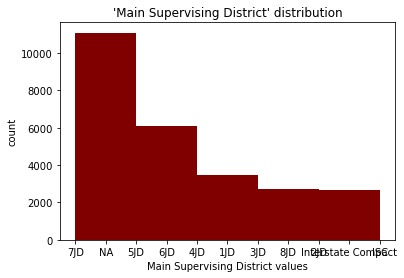

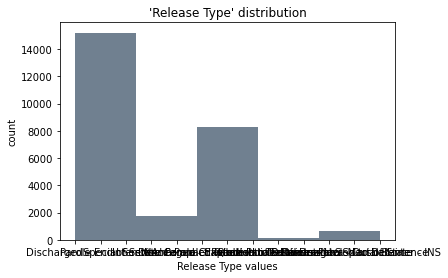

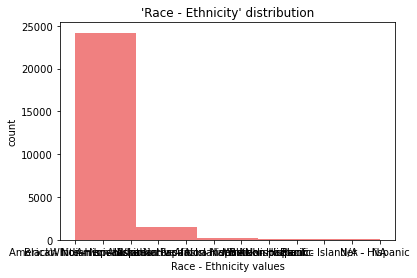

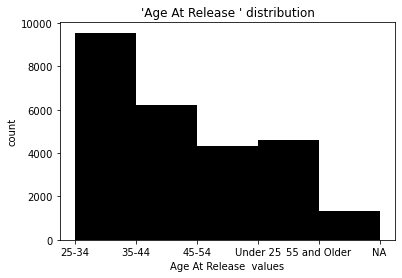

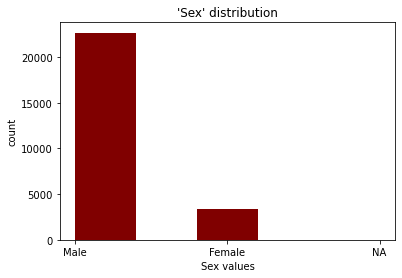

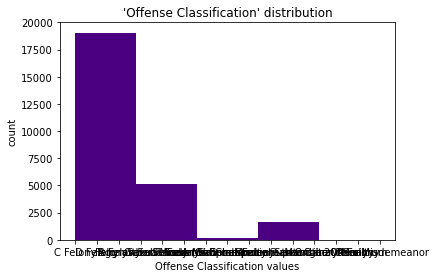

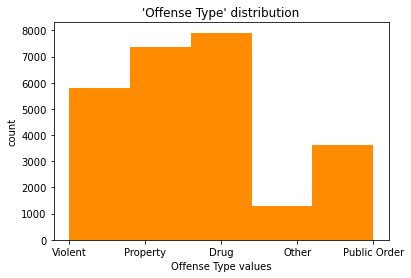

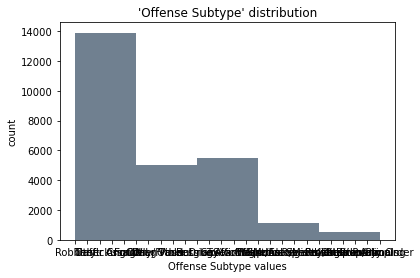

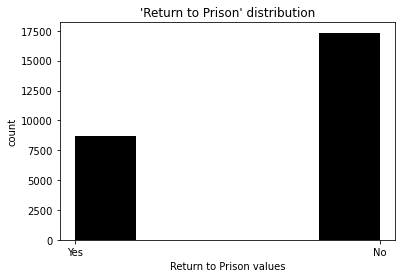

In [3]:
colors = ['black', 'lightcoral', 'darkorange', 'maroon', 'slategrey', 'indigo', 'cornflowerblue', 'turqoise']
from random import randrange
import plot_utils
for column_name in table.column_names:
    attributes = table.get_column(column_name, include_missing_values=True)
    title = f"'{column_name}' distribution"
    x_label = f"{column_name} values"
    y_label = 'count'
    rand_val = randrange(7)
    color = colors[rand_val]
    plot_utils.histogram_chart(attributes, title,x_label, y_label, color)
    
    

## Step 3: Community Percentages
Create pie charts to help better understand percentages of data

#### Creating a pie plot for each column

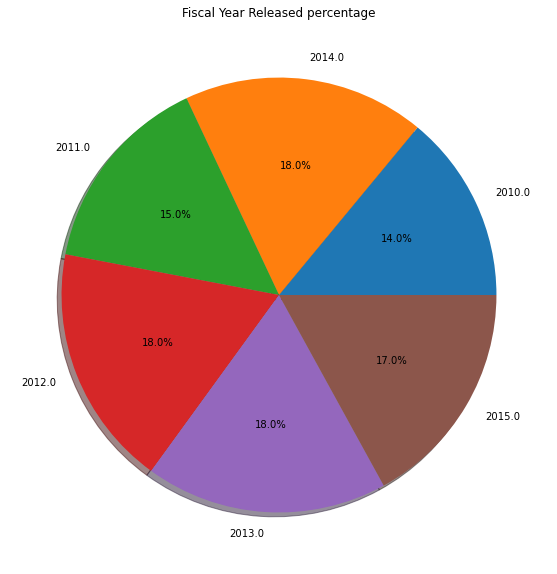

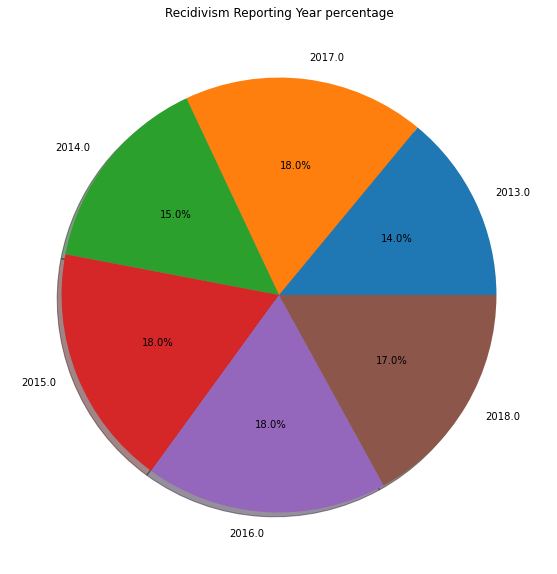

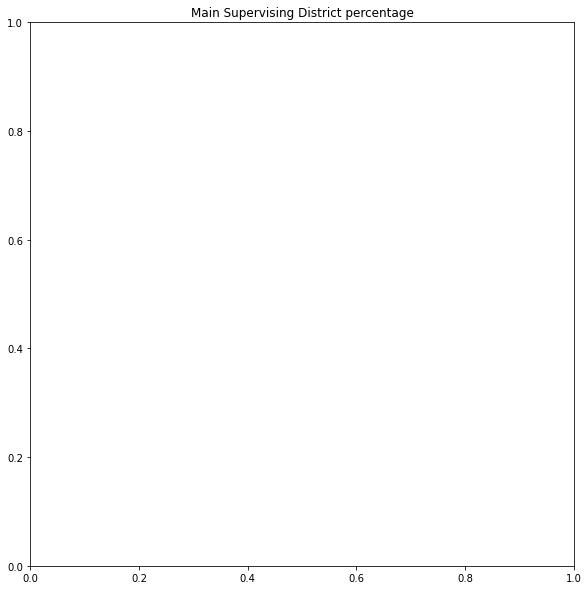

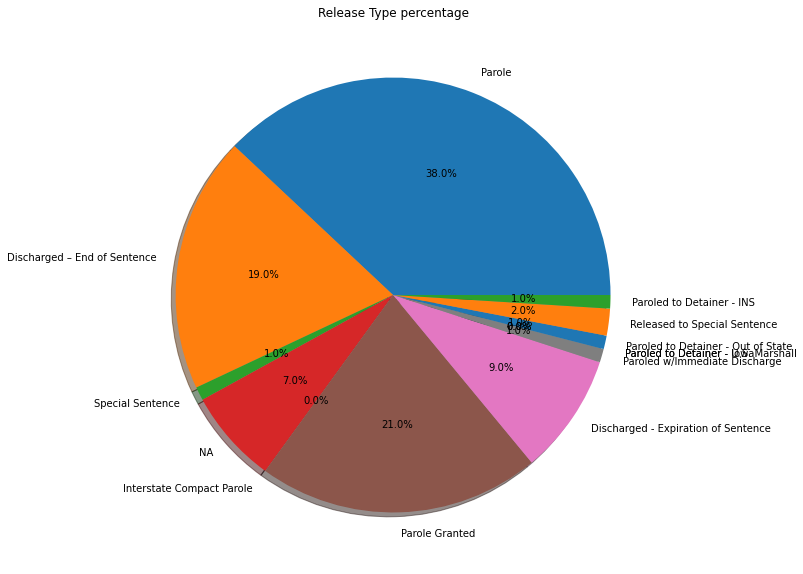

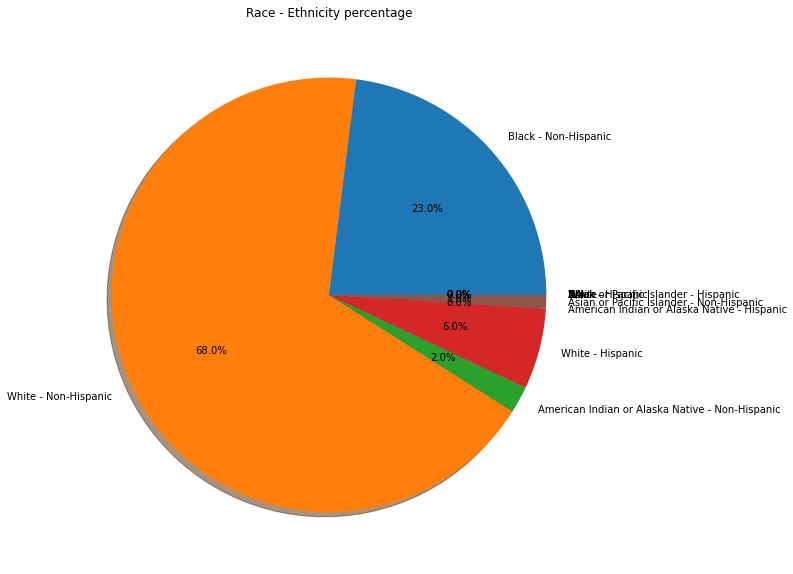

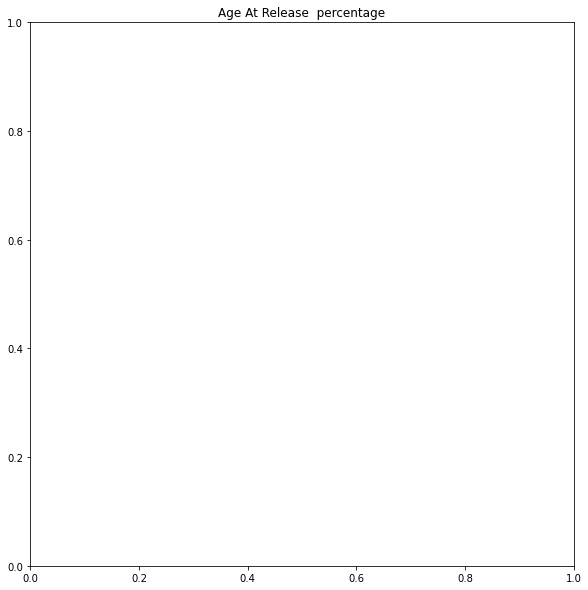

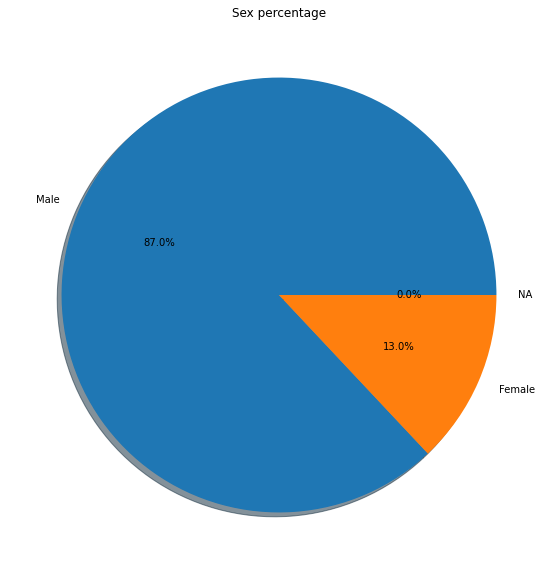

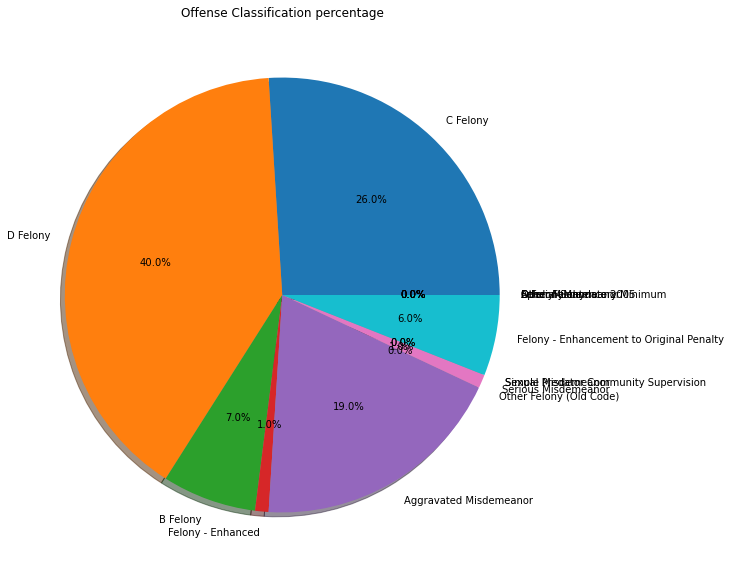

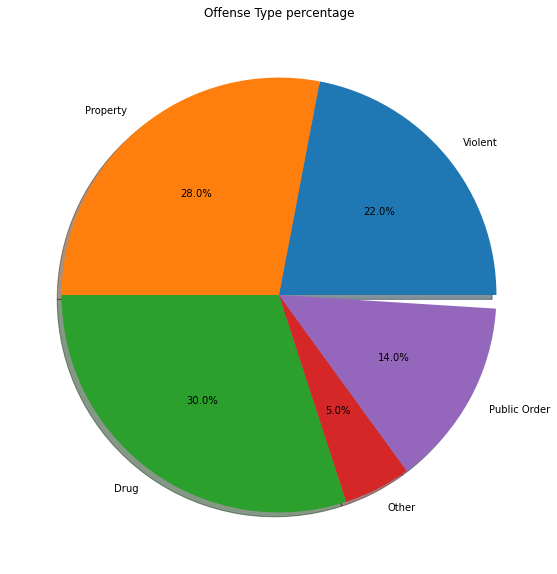

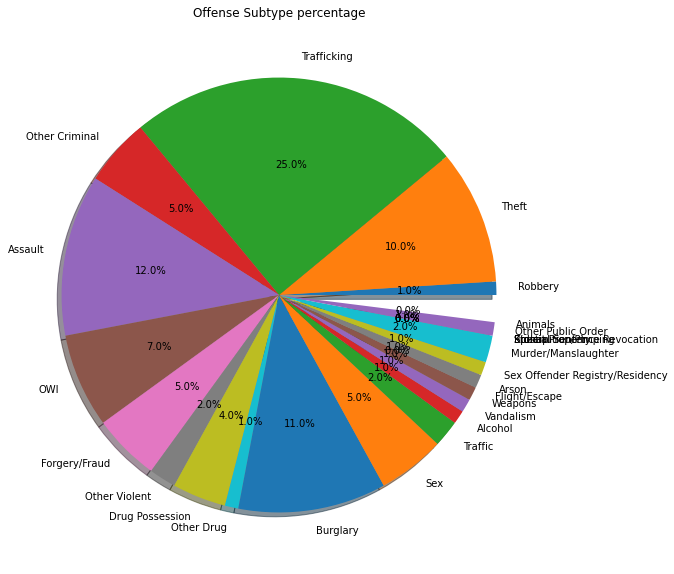

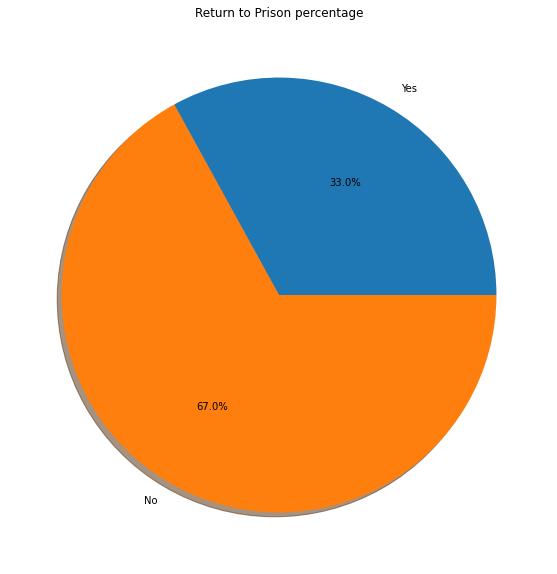

In [4]:
import plot_utils
for column_name in table.column_names:
    attributes = table.get_column(column_name, include_missing_values=True)
    grouping, names = myutils.grouping(attributes)
    try:
        plot_utils.pie_chart(grouping, names, column_name + " percentage")
    except:
        pass

In [6]:
filename = os.path.join("data", "cleaned-recidivisim-data-NA.csv")
table = myutils.get_table_with_file_data(filename)

x_table_data = [MyPyTable.get_partial_row(row, exclude_indices=[-1]) for row in table.data]
y_table_data = table.get_column("Return to Prison")

X_table = MyPyTable(column_names=table.column_names[:-1], data=x_table_data)
y_table = MyPyTable(column_names=table.column_names[-1:], data=y_table_data)

k = 10
labels = ["Yes", "No"]
positive_label = "Yes"
confusion_matrix_header = ["Return To Prison"] + labels + ["Total", "Recognition (%)"]

X_train_1, X_test_1, y_train_1, y_test_1 = myutils.kfold_test_train_split(x_table.data, y_table.data, k, 0, False, stratified=True)

classifiers = [
    MyNaiveBayesClassifier()
]
for classifier in classifiers:
    classifier.fit(X_train_1, y_train_1)
    y_predicted = classifier.predict(X_test_1)
    accuracy = myevaluation.accuracy_score(y_test_1, y_predicted)
    error_rate = 1 - accuracy
    precision = myevaluation.binary_precision_score(y_test_1, y_predicted, labels, positive_label)
    recall = myevaluation.binary_recall_score(y_test_1, y_predicted, labels, positive_label)
    f1_measure = myevaluation.binary_f1_score(y_test_1, y_predicted, labels, positive_label)
    confusion_matrix = myevaluation.confusion_matrix(y_test_1, y_predicted, labels)
    enhanced_confusion_matrix = myutils.enhance_confusion_matrix(confusion_matrix, labels)
    print(f"Evaluation metrics for {classifier.__class__.__name__}:")
    print(f"Accuracy: {accuracy}")
    print(f"Error Rate: {error_rate}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 measure: {f1_measure}")
    print(tabulate(enhanced_confusion_matrix, headers=confusion_matrix_header) + "\n\n")

FileNotFoundError: [Errno 2] No such file or directory: 'data/cleaned-recidivisim-data-NA.csv'